# Introduction

The dataset is from kaggle you can view it and understand columns from this link
https://www.kaggle.com/lava18/google-play-store-apps

### `Import Main Libraries`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# impute missing vals. 
from sklearn.impute import KNNImputer, SimpleImputer

# detect outliers
from datasist.structdata import detect_outliers
sns.set(rc={"figure.figsize" : [8,8]}, font_scale=1.2 , style='darkgrid')

### `Load The Data`

In [2]:
df = pd.read_csv("data/googleplaystore.csv")
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8739,Find Fast Food,SHOPPING,3.3,272,785k,"100,000+",Free,0,Everyone,Shopping,"November 11, 2012",1.1.6,2.2 and up
6089,BF at Sea Refueled,GAME,4.4,1849,37M,"10,000+",Free,0,Everyone,Board,"October 20, 2015",1.1.8,2.3.3 and up
5154,San Dimas AH,MEDICAL,NaN,0,29M,100+,Free,0,Everyone,Medical,"February 18, 2018",300000.0.97,4.0.3 and up
9163,Asphalt Xtreme: Rally Racing,GAME,4.5,567984,39M,"10,000,000+",Free,0,Everyone,Racing,"July 16, 2018",1.7.3b,4.0.3 and up
5102,Ag PhD Soils,PRODUCTIVITY,2.3,3,16M,"1,000+",Free,0,Everyone,Productivity,"July 16, 2018",1.24.1,4.4 and up


### `Info. about Features`

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### `Data Cleaning`
##### fix `Reviews` column

In [4]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

##### fix `Size` column

In [5]:
def fixSize(size):
    try :
        if size.endswith("M"):
            return float(size[:-1])
        elif size.endswith("K"):
            return float(size[:-1]) / 1024
        elif size == "1,000+":
            return 1.0
        else :
            return np.nan
    except :
        return np.nan

df["Size"] = df["Size"].apply(fixSize)
df["Size"].dtype

dtype('float64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


##### fix `Price` column

In [7]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [8]:
def fixPrice(price):
    try :
        if price.startswith("$"):
            return float(price[1:])
        else :
            return 0.0
    except :
        return np.nan

df["Price"] = df["Price"].apply(fixPrice)
df["Price"].dtype

dtype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            8830 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [10]:
df.describe() # some Statistics info. about data

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,8830.000000,10841.000000
mean,4.193338,4.441529e+05,22.268131,1.027273
std,0.537431,2.927761e+06,22.628542,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000
25%,4.000000,3.800000e+01,5.400000,0.000000
50%,4.300000,2.094000e+03,14.000000,0.000000
75%,4.500000,5.477550e+04,31.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


##### `Note`
> `Rating` column has values greater than 5

In [11]:
idx = df[df["Rating"] > 5].index
df.drop(idx, axis=0 , inplace=True)

In [12]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,8829.000000,10840.000000
mean,4.191757,4.441529e+05,22.270540,1.027368
std,0.515219,2.927761e+06,22.628691,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000
25%,4.000000,3.800000e+01,5.400000,0.000000
50%,4.300000,2.094000e+03,14.000000,0.000000
75%,4.500000,5.477550e+04,31.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


In [13]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9863,EU Mobile Money,FINANCE,3.9,460.0,6.1,"100,000+",Free,0.00,Everyone,Finance,"July 16, 2018",1.6,4.0 and up
6547,Skip-Bo™,GAME,4.4,33661.0,60.0,"100,000+",Paid,2.99,Everyone,Card,"August 3, 2018",3.4.6,4.1 and up
8657,MyLifeOrganized: To-Do List,PRODUCTIVITY,4.3,4441.0,NaN,"100,000+",Free,0.00,Everyone,Productivity,"June 18, 2018",Varies with device,Varies with device


In [14]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
df["Category"] = df["Category"].apply(lambda c: c.lower())
df["Category"].unique()

array(['art_and_design', 'auto_and_vehicles', 'beauty',
       'books_and_reference', 'business', 'comics', 'communication',
       'dating', 'education', 'entertainment', 'events', 'finance',
       'food_and_drink', 'health_and_fitness', 'house_and_home',
       'libraries_and_demo', 'lifestyle', 'game', 'family', 'medical',
       'social', 'shopping', 'photography', 'sports', 'travel_and_local',
       'tools', 'personalization', 'productivity', 'parenting', 'weather',
       'video_players', 'news_and_magazines', 'maps_and_navigation'],
      dtype=object)

In [16]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [17]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [18]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [19]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df.drop(['Genres', 'Last Updated', 'Current Ver'], axis=1, inplace=True)
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver
5283,Crisis Action: 2018 NO.1 FPS,game,4.3,807226.0,34.0,"10,000,000+",Free,0.00,Teen,4.0.3 and up
793,"Learn languages, grammar & vocabulary with Mem...",education,4.7,1107884.0,NaN,"10,000,000+",Free,0.00,Everyone,Varies with device
4329,Tom Loves Angela,family,4.1,1111915.0,50.0,"100,000,000+",Free,0.00,Everyone,4.1 and up
8362,Penny Finder,shopping,4.2,470.0,4.1,"10,000+",Paid,2.99,Everyone,4.1 and up
8174,"Face Filter, Selfie Editor - Sweet Camera",photography,4.7,142758.0,22.0,"10,000,000+",Free,0.00,Everyone,4.4 and up


In [21]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [22]:
def is_v_4(version):
    try :
        if version.startswith("4"):
            return "Yes"
        else :
            return "No"
    except :
        return np.nan

df["is_ver_4"] = df["Android Ver"].apply(is_v_4)

In [23]:
df["is_ver_4"].value_counts()

Yes    6959
No     3879
Name: is_ver_4, dtype: int64

##### `Note`
> From the above data set and doing the necessary analysis, it is evident that apps using version 4 are more abundant

In [24]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,is_ver_4
2305,FollowMyHealth®,medical,4.6,73118.0,37.0,"1,000,000+",Free,0.0,Everyone,4.4 and up,Yes
205,Polaris Office for LG,business,4.2,30847.0,55.0,"5,000,000+",Free,0.0,Everyone,4.1 and up,Yes
9907,E.U. Trademark Search Tool,business,NaN,0.0,3.1,10+,Free,0.0,Everyone,4.0.3 and up,Yes


In [25]:
df.drop('Android Ver', axis=1, inplace=True)
df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_ver_4
10838,Parkinson Exercices FR,medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,No
10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,No
10840,iHoroscope - 2018 Daily Horoscope & Astrology,lifestyle,4.5,398307.0,19.0,"10,000,000+",Free,0.0,Everyone,No


#### `Check Null Value`

In [26]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              2011
Installs             0
Type                 1
Price                0
Content Rating       0
is_ver_4             2
dtype: int64

##### Columns (Rating , Size, Type, is_ver_4) Has missing values

#### `Impue Missing values with SimpleImputer`

In [27]:
imputer = SimpleImputer(strategy="most_frequent")
df["is_ver_4"] = imputer.fit_transform(df[["is_ver_4"]])
df["Type"] = imputer.fit_transform(df[["Type"]])

#### `Impue Missing values with KnnImputer`

In [28]:
imputer = KNNImputer(n_neighbors=5)

In [29]:
df["Rating"] = imputer.fit_transform(df[["Rating"]])
df["Size"] = imputer.fit_transform(df[["Size"]])

In [30]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
is_ver_4          0
dtype: int64

In [31]:
df.describe()

,Rating,Reviews,Size,Price
count,10840.000000,1.084000e+04,10840.000000,10840.000000
mean,4.191757,4.441529e+05,22.270540,1.027368
std,0.478907,2.927761e+06,20.421893,15.949703
min,1.000000,0.000000e+00,1.000000,0.000000
25%,4.100000,3.800000e+01,6.800000,0.000000
50%,4.200000,2.094000e+03,20.000000,0.000000
75%,4.500000,5.477550e+04,26.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


#### `Detect Outliers`

In [32]:
idx = detect_outliers(df, 0, ['Rating', 'Reviews', 'Size', 'Price'])
idx

[15,
 87,
 159,
 176,
 209,
 311,
 312,
 325,
 477,
 492,
 501,
 510,
 513,
 514,
 518,
 520,
 522,
 527,
 528,
 533,
 546,
 549,
 554,
 555,
 572,
 578,
 588,
 611,
 619,
 625,
 645,
 663,
 678,
 681,
 684,
 694,
 696,
 862,
 869,
 885,
 915,
 1056,
 1057,
 1186,
 1190,
 1213,
 1217,
 1263,
 1472,
 1491,
 1528,
 1548,
 1561,
 1571,
 1576,
 1591,
 1594,
 1782,
 1784,
 2087,
 2249,
 2260,
 2264,
 2266,
 2295,
 2300,
 2317,
 2327,
 2329,
 2337,
 2351,
 2355,
 2360,
 2387,
 2403,
 2408,
 2411,
 2412,
 2428,
 2487,
 2492,
 2517,
 2521,
 2531,
 2535,
 2702,
 2824,
 3001,
 3021,
 3023,
 3034,
 3131,
 3133,
 3137,
 3139,
 3146,
 3165,
 3247,
 3250,
 3262,
 3268,
 3271,
 3273,
 3279,
 3460,
 3483,
 3698,
 3709,
 3741,
 3748,
 3891,
 3938,
 3955,
 3961,
 3962,
 3963,
 3972,
 3979,
 4006,
 4010,
 4062,
 4066,
 4078,
 4127,
 4135,
 4161,
 4164,
 4165,
 4168,
 4171,
 4181,
 4187,
 4194,
 4209,
 4210,
 4226,
 4230,
 4251,
 4253,
 4258,
 4331,
 4361,
 4373,
 4375,
 4386,
 4389,
 4392,
 4470,
 4492,


In [33]:
outliers = df.loc[idx]
df_without_outliers = df.drop(idx, axis=0)

In [34]:
outliers.shape

(3882, 10)

In [35]:
df_without_outliers.shape

(6958, 10)

## `EDA` 

##### `What is the most expensive app on the store.`

In [36]:
df[df["Price"] == df["Price"].max()][["App","Price"]]

,App,Price
4367,I'm Rich - Trump Edition,400.0


> the most expensive App is `I'm Rich - Trump Edition`and the Price is `400` .

##### `Which Genre has more apps.`

In [37]:
df["Category"].value_counts(ascending=False)

family                 1972
game                   1144
tools                   843
medical                 463
business                460
productivity            424
personalization         392
communication           387
sports                  384
lifestyle               382
finance                 366
health_and_fitness      341
photography             335
social                  295
news_and_magazines      283
shopping                260
travel_and_local        258
dating                  234
books_and_reference     231
video_players           175
education               156
entertainment           149
maps_and_navigation     137
food_and_drink          127
house_and_home           88
auto_and_vehicles        85
libraries_and_demo       85
weather                  82
art_and_design           65
events                   64
parenting                60
comics                   60
beauty                   53
Name: Category, dtype: int64

> The Category that has many apps is the `family` and its count `1972`

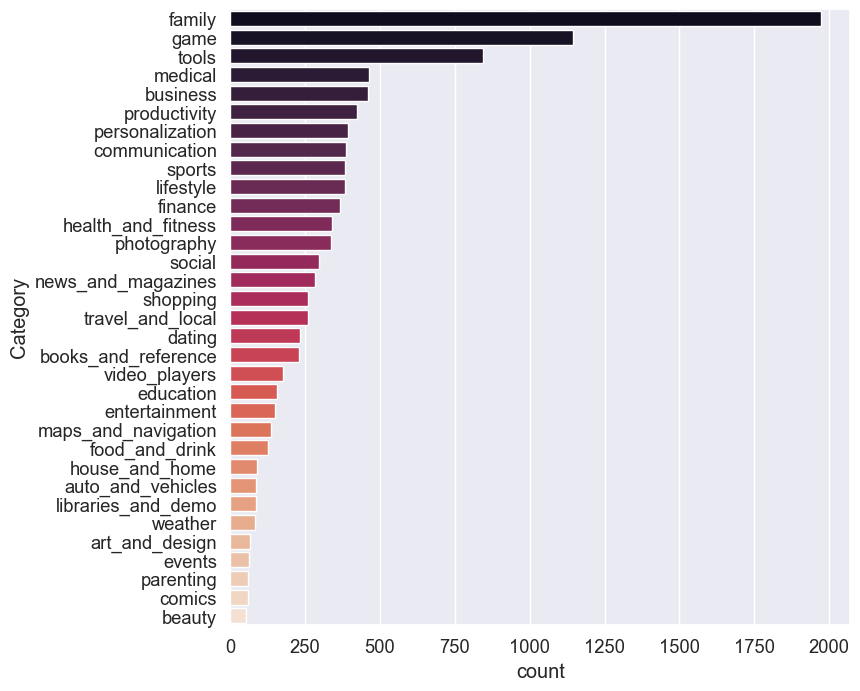

In [38]:
sns.countplot(data=df, y="Category", palette="rocket", order=df["Category"].value_counts(ascending=False).index)
plt.show()

##### `What is the average size of the free apps & paid apps.`

In [39]:
df.groupby("Type")[["Size"]].mean()

,Size
Type,
Free,22.331789
Paid,21.501874


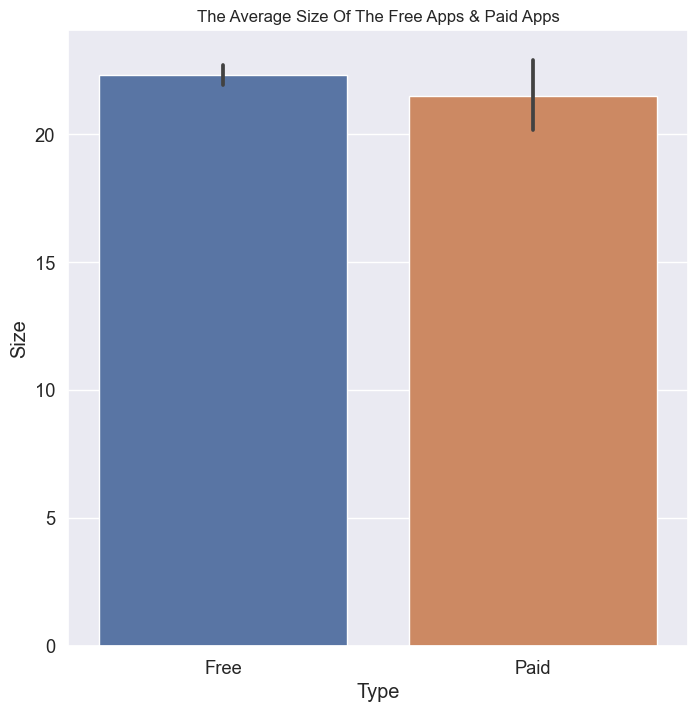

In [40]:
sns.barplot(data=df, x="Type", y="Size", estimator=np.mean)
plt.title("the average size of the free apps & paid apps".title(), fontsize=12)
plt.show()

##### `What is the 5 top expenisve apps that has rate of 5.`

In [41]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Yes


In [42]:
df[(df["Price"] > 0) & (df["Rating"] == 5)].sort_values(by="Price", ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_ver_4
5489,AP Art History Flashcards,family,5.0,1.0,96.00000,10+,Paid,29.99,Mature 17+,Yes
7477,USMLE Step 2 CK Flashcards,family,5.0,1.0,40.00000,10+,Paid,19.99,Everyone,No
5482,meStudying: AP English Lit,family,5.0,1.0,22.27054,10+,Paid,4.99,Everyone,No
7204,TI-84 CE Graphing Calculator Manual TI 84,family,5.0,1.0,27.00000,100+,Paid,4.99,Everyone,Yes
5246,Hey AJ! It's Bedtime!,family,5.0,1.0,63.00000,10+,Paid,4.99,Everyone,No


#### `How many apps that has more than 50K reviews?`

In [43]:
df[df["Reviews"] > 50000].sort_values(by="Reviews").reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_ver_4
0,3043,DraftKings - Daily Fantasy Sports,sports,4.5,50017.0,41.00000,"1,000,000+",Free,0.0,Adults only 18+,Yes
1,9677,Masha and The Bear Jam Day Match 3 games for kids,family,4.6,50060.0,98.00000,"1,000,000+",Free,0.0,Everyone,Yes
2,8294,Bokeh (Background defocus),photography,4.0,50109.0,22.27054,"10,000,000+",Free,0.0,Everyone,No
3,3098,Fantasy Football,sports,3.5,50179.0,23.00000,"1,000,000+",Free,0.0,Everyone,No
4,3046,Fantasy Football,sports,3.5,50179.0,23.00000,"1,000,000+",Free,0.0,Everyone,No
...,...,...,...,...,...,...,...,...,...,...,...
2777,3904,WhatsApp Messenger,communication,4.4,69109672.0,22.27054,"1,000,000,000+",Free,0.0,Everyone,No
2778,336,WhatsApp Messenger,communication,4.4,69119316.0,22.27054,"1,000,000,000+",Free,0.0,Everyone,No
2779,381,WhatsApp Messenger,communication,4.4,69119316.0,22.27054,"1,000,000,000+",Free,0.0,Everyone,No
2780,3943,Facebook,social,4.1,78128208.0,22.27054,"1,000,000,000+",Free,0.0,Teen,No


> There are `2782` Apps have Reviews more than 50k+ 

#### `What is the average price of the apps for each genre with each installs numbers ?`


In [44]:
pd.pivot_table(data=df, index="Category", values="Price", columns="Installs", aggfunc="mean")

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
art_and_design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
auto_and_vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
books_and_reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
dating,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


#### `How many apps have rating > 4.7 and what is thier avg price?`

In [45]:
df[df["Rating"] > 4.7].groupby("Rating")["Price"].agg(["mean","count"])

,mean,count
Rating,,
4.8,0.759103,234
4.9,0.217701,87
5.0,0.372372,274


In [46]:
df[df["Rating"] > 4.7]["Price"].agg(["mean","count"])

mean       0.501849
count    595.000000
Name: Price, dtype: float64

> ###### The count of App that have Rating > 4.7 is `595` and the `avg price = 0.5`

##### `How much google earned from the 5,000,000+ installed apps ?`


In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,is_ver_4
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Yes
1,Coloring book moana,art_and_design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Yes
3,Sketch - Draw & Paint,art_and_design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Yes
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Yes


In [48]:
df[df["Installs"] == "5,000,000+"]["Price"].sum()

0.0

##### ` What is the max and min size for free and paid apps?`

In [49]:
df.groupby("Type")["Size"].agg(["min","max"])

,min,max
Type,,
Free,1.0,100.0
Paid,1.0,100.0


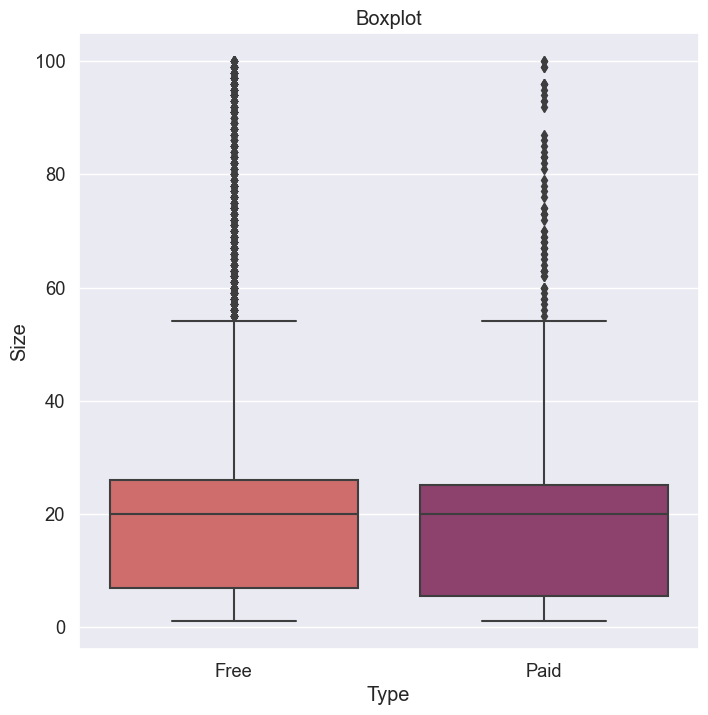

In [52]:
sns.boxplot(x='Type', y='Size', data=df, palette='flare')
plt.title("boxplot".title())
plt.show()

##### `is there a correlation between rating, Reviews, Size with the price of the app?`


In [54]:
df.corr(numeric_only=True)

,Rating,Reviews,Size,Price
Rating,1.000000,0.068018,0.066960,-0.020190
Reviews,0.068018,1.000000,0.127706,-0.009667
Size,0.066960,0.127706,1.000000,-0.021778
Price,-0.020190,-0.009667,-0.021778,1.000000


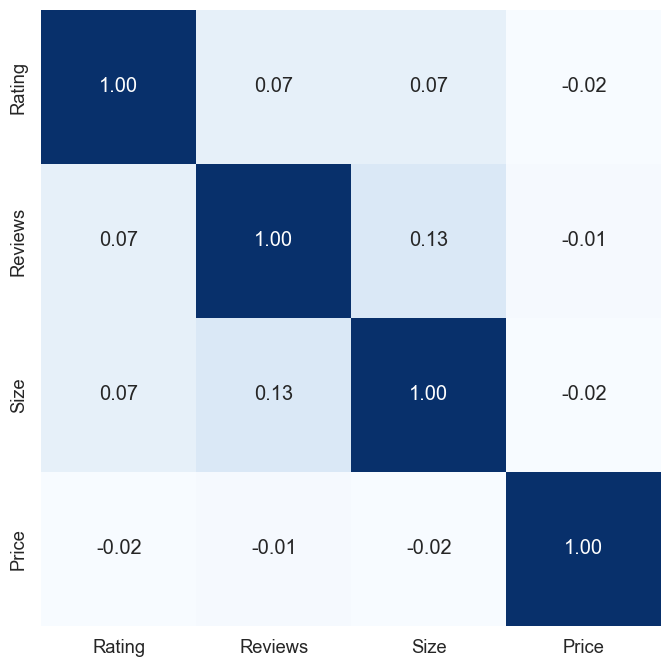

In [61]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cbar=False, cmap="Blues")
plt.show()

In [62]:
df.corr(numeric_only=True)['Price'].to_frame()

,Price
Rating,-0.020190
Reviews,-0.009667
Size,-0.021778
Price,1.000000


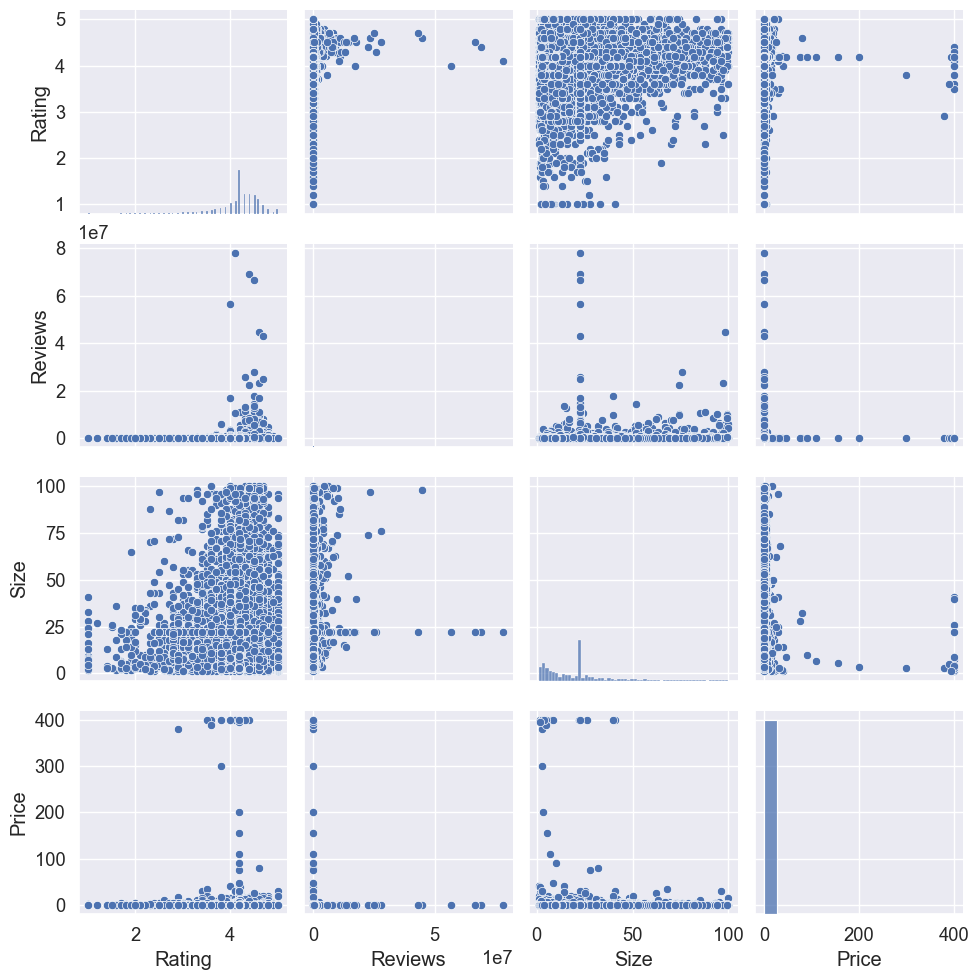

In [63]:
sns.pairplot(df)
plt.show()

> `Weak Correlation` between Rating, Reviews, Size with the price

##### `How many apps for each type for each content reading?`


In [73]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [72]:
pd.pivot_table(data=df, index="Type",columns="Content Rating",  values='Rating', aggfunc="count")

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Type,,,,,,
Free,3.0,8019.0,381.0,479.0,1156.0,2.0
Paid,NaN,695.0,33.0,20.0,52.0,NaN


##### `How many apps that can work on android version 4?`


In [75]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'is_ver_4'],
      dtype='object')

In [76]:
df['is_ver_4'].value_counts()

Yes    6961
No     3879
Name: is_ver_4, dtype: int64

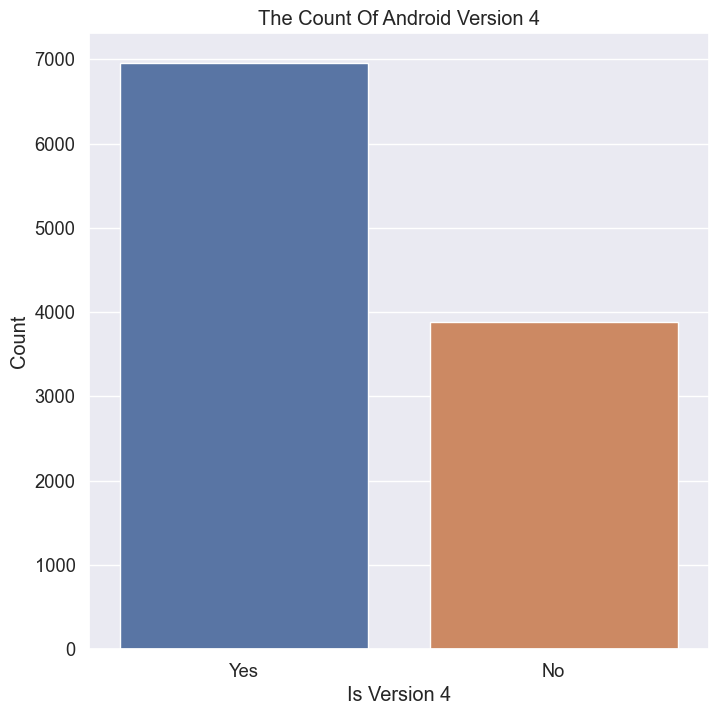

In [80]:
sns.countplot(x='is_ver_4', data=df)
plt.title("the count of android version 4".title())
plt.ylabel("Count")
plt.xlabel("Is Version 4")
plt.show()